## Reading Input

In [ ]:
import pandas as pd
from proj_utils.input_interpreter import format_input

In [ ]:
customer_df = pd.read_excel('data/2_detail_table_customers.xls')
deposit_df = pd.read_excel('data/4_detail_table_depots.xls')
routes = customer_df['ROUTE_ID'].unique()

In [ ]:
print(routes)

In [ ]:
from proj_utils.fake_input_generator import generator
from proj_utils.input_interpreter import format_input

import matplotlib.pyplot as plt

from VHR.greedy_solutions import nearest_neighbour_solution
from VHR.modify_solution import combined_rand_modification, crossover_sols
from VHR.verify_solution import valid_path, calculate_path_distance

from proj_utils.path import print_path
%matplotlib widget

# Simulated Annealing Solution

In [76]:
import simulated_annealing.solver as SA # Simulated anealing solver

In [96]:
dists, demand, points = format_input(routes[2],customer_df,deposit_df)
#dists, demand, points = generator(20)

In [97]:
solver = SA.generic_solver_factory(
    lambda: nearest_neighbour_solution(dists, demand, (3000,20)),
    lambda x: combined_rand_modification(x, len(points)),
    lambda x: calculate_path_distance(x, dists) if(valid_path(x,(3000,20),demand)) else float('inf'),
    return_history = True
    )

In [98]:
sol,history = solver(200000)

In [99]:
print(history['current_energy'][-1])

13.292277888000767


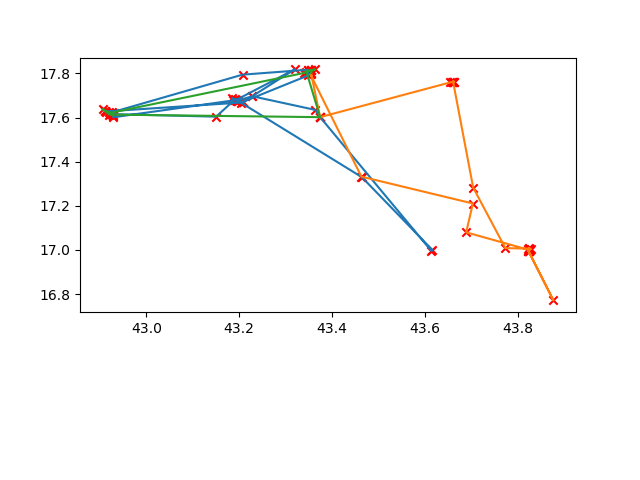

In [100]:
print_path(points,sol)

Text(0, 0.5, 'taille du chemin')

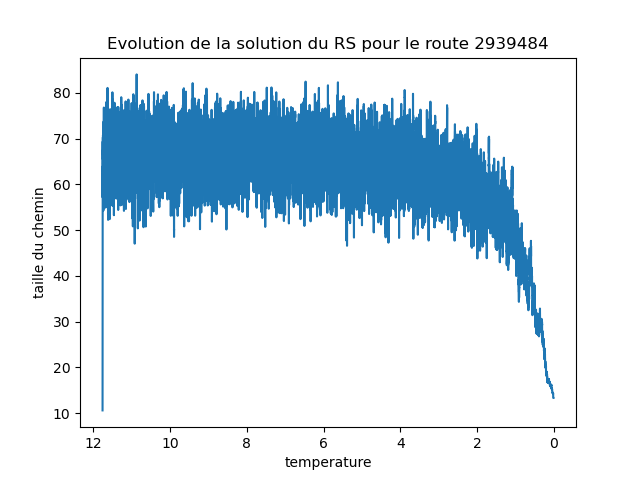

In [101]:
energy_fig, energy_ax = plt.subplots()
energy_ax.plot(history['temperature'],history['current_energy'])
energy_ax.invert_xaxis()
energy_ax.set_title(f"Evolution de la solution du RS pour le route {routes[2]}")
energy_ax.set_xlabel("temperature")
energy_ax.set_ylabel("taille du chemin")

# Genetic Algorithm

In [ ]:
import genetic_algorithm.solver as GA

In [71]:
dists, demand, points = format_input(routes[4],customer_df,deposit_df)
#dists, demand, points = generator(40)

In [72]:
import random
solver = GA.generic_solver_factory(
    lambda n: [nearest_neighbour_solution(dists, demand, (3000,20), start_node= int(random.random()*(len(points)-2))+1) for _ in range(n) ],
    lambda x: calculate_path_distance(x, dists) if(valid_path(x,(3000,20),demand)) else float('inf'),
    crossover_sols,
    lambda x: combined_rand_modification(x,len(points)),
    return_history = True

)

In [73]:
sol,history = solver(370, 100, 0.5)

9.762240507050747


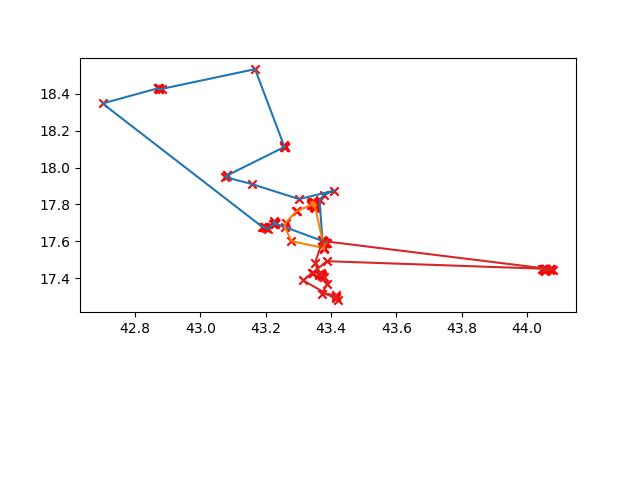

In [74]:
print_path(points,history["states"][-1])
print(calculate_path_distance(history['states'][-1], dists))

Text(0, 0.5, 'taille du chemin')

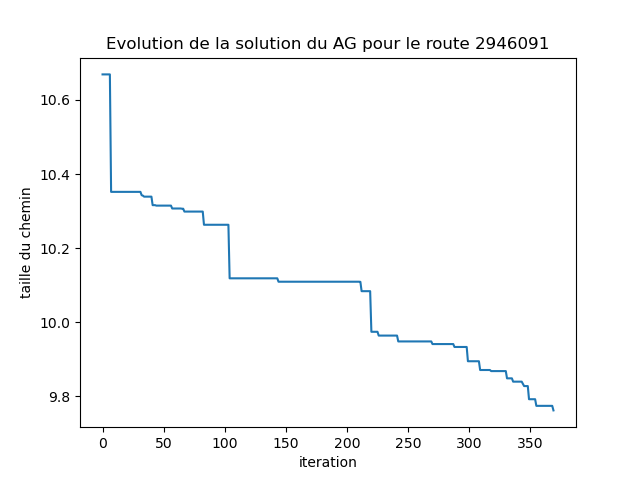

In [75]:
energy_fig, energy_ax = plt.subplots()
energy_ax.plot(list(range(len(history['best_fitness']))),[x for x in history['best_fitness']])
energy_ax.set_title(f"Evolution de la solution du AG pour le route {routes[0]}")
energy_ax.set_xlabel("iteration")
energy_ax.set_ylabel("taille du chemin")